In [1]:
import numpy as np
import pylab as plt
import scipy as sc

import networkx as nx

from NAQ_graphs import NAQ
%matplotlib notebook

<IPython.core.display.Javascript object>


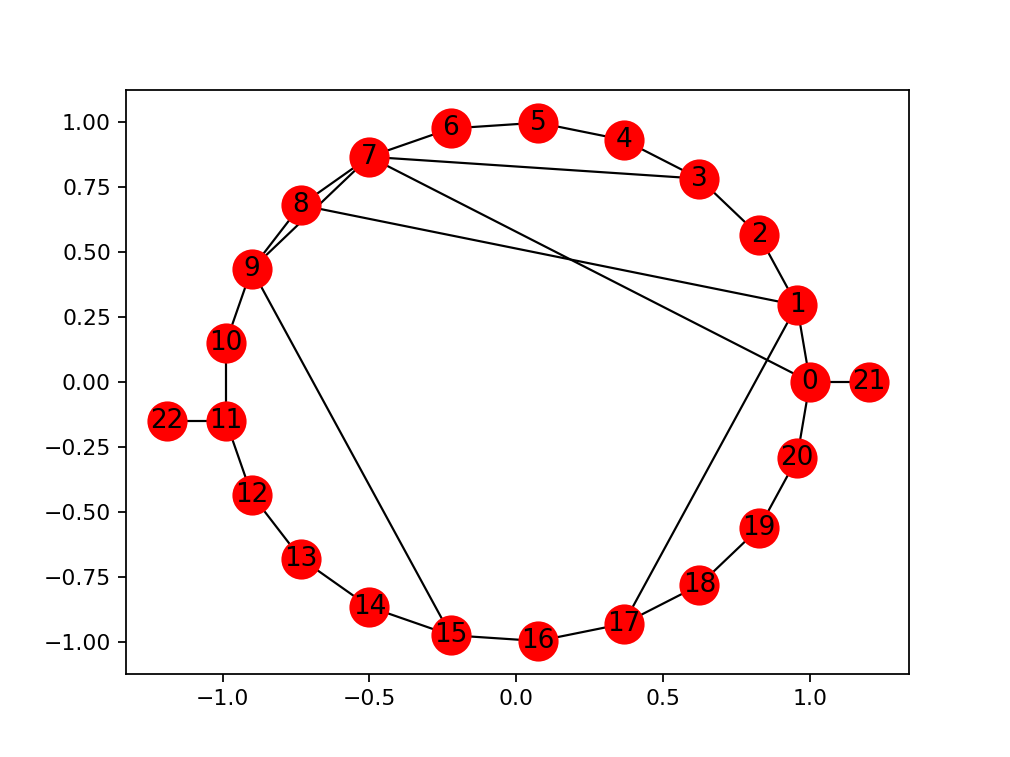

In [12]:
%matplotlib notebook

G = nx.newman_watts_strogatz_graph(21, 3, 0.2)
pos = {i: np.array([np.cos(2*np.pi*i/len(G)),np.sin(2*np.pi*i/len(G))]) for i in range(len(G))}

#add one ouput channel
G.add_edge(len(G),0)
pos[len(G)-1] = pos[0]+[0.2,0]
G.add_edge(len(G),11)
pos[len(G)-1] = pos[11]+[-0.2,0]

chi = np.array([ 1.j for i in range(len(G.edges))])

plt.figure()
nx.draw_networkx(G,pos=pos)

In [13]:
naq_u1 = NAQ(G, positions = pos, chi = chi, group = 'U1', open_graph = True)
naq_u1.set_chi((1.+1.j)*naq_u1.chi0)
naq_u1.update_laplacian()
        
L = naq_u1.L0.todense()

<IPython.core.display.Javascript object>


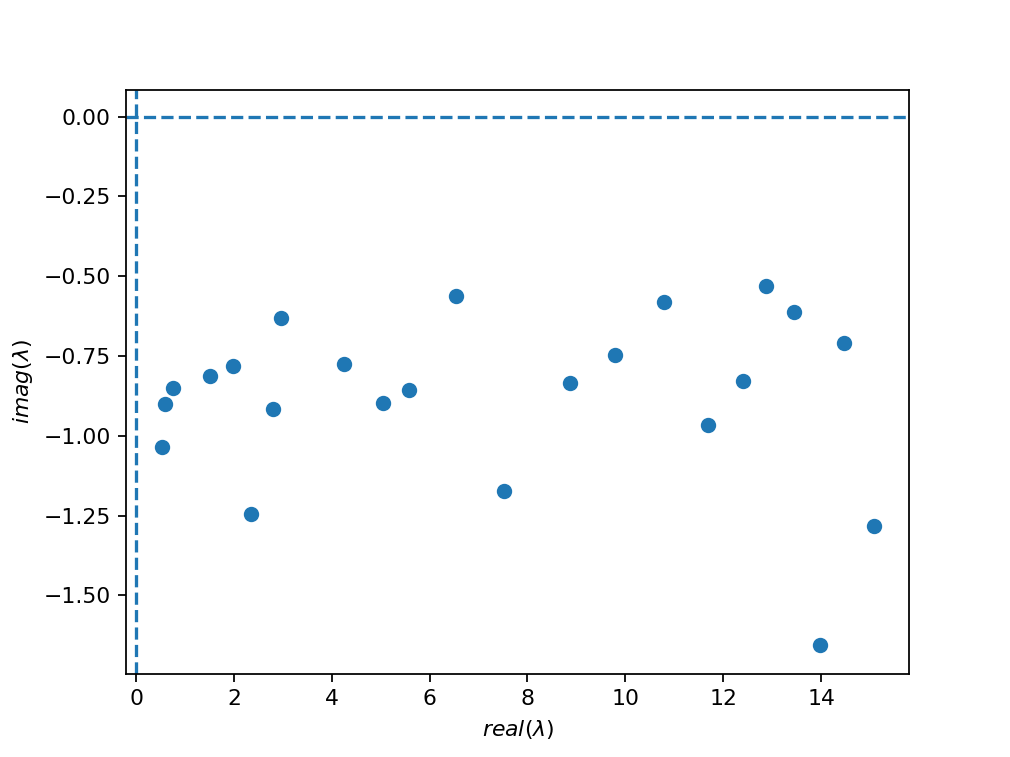

In [20]:
w, v = np.linalg.eig(L)

plt.figure()
plt.scatter(np.real(w), np.imag(w))
plt.xlabel(r'$real(\lambda)$')
plt.ylabel(r'$imag(\lambda)$')

plt.axvline(0,ls='--')
plt.axhline(0,ls='--')

In [14]:
#setting up the parameters for the search
search_params = {}
search_params['s_min']     = 1e-4 #minimum value for the condition numbe
search_params['s_size']    = np.asarray([0.1, 0.1]) #size of random steps (smaller it will converge slowly, larger it will never accept steps)
search_params['max_steps'] = 1000 #max number of steps before it gives up
search_params['reduc']     = 1. #if it does not improve after 20 steps, multiply by this number (not really needed)
naq_u1.n_processes_scan = 4 #number of CPU to use

K = naq_u1.find_mode([10,0.04], search_params, disp=False, save_traj=True)

In [15]:
Ks = np.linspace(9,11,10)
Alphas = np.linspace(0,.15,10)

modes = naq_u1.find_modes(Ks, Alphas, search_params, th = 1e-3) #find many modes (start many searches in a grid)

11 modes out of 99 attempts


In [16]:
Ks = np.linspace(8,12,100)
Alphas = np.linspace(0,.1,50)

s = naq_u1.scan_k(Ks,Alphas)#compute a fine scan of the parameter space

<IPython.core.display.Javascript object>


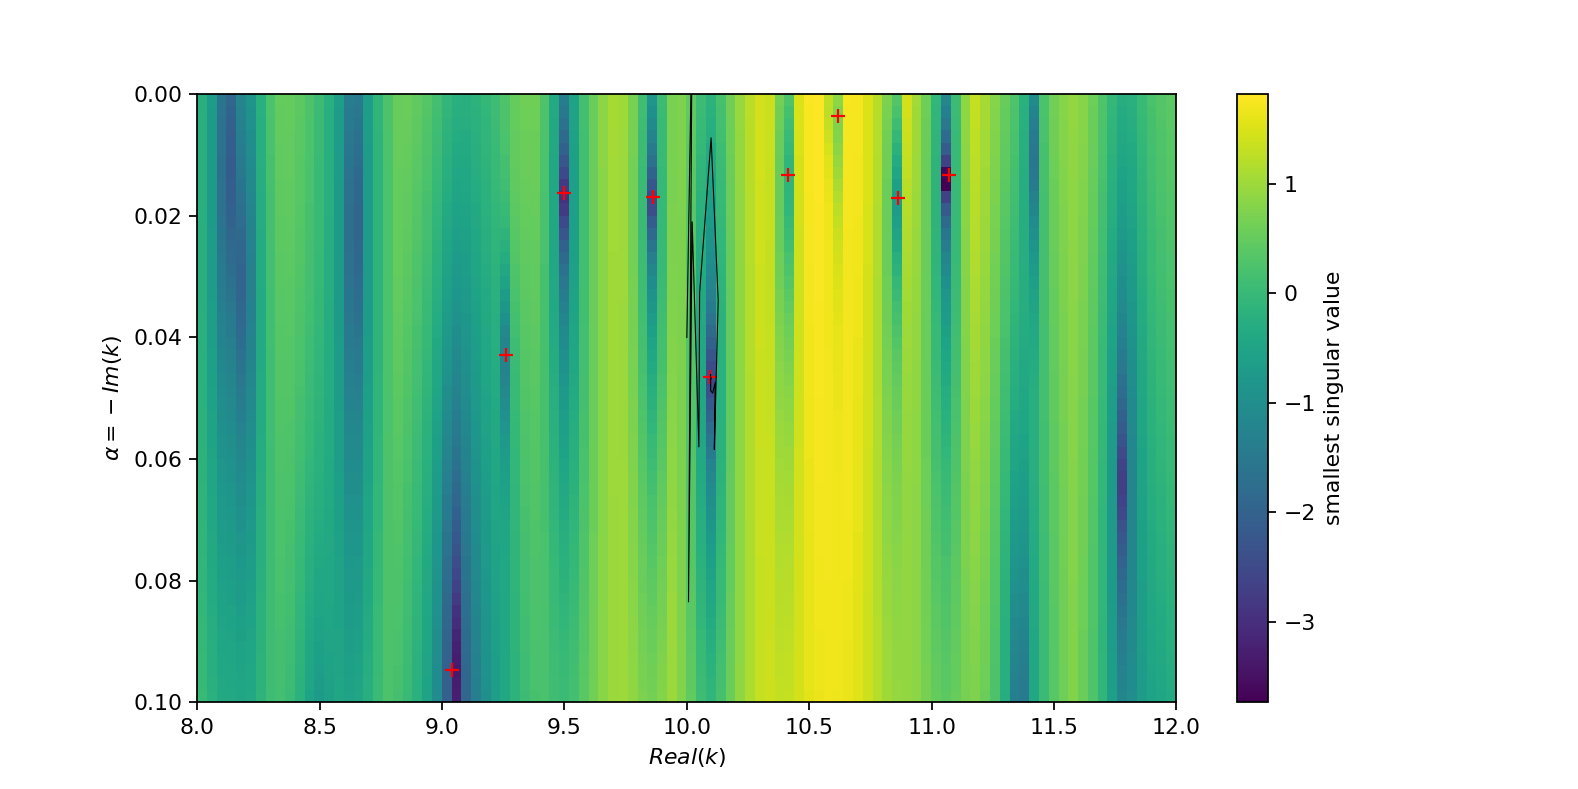

In [17]:
naq_u1.plot_scan(Ks,Alphas,s,modes)
plt.plot(K[:,0],K[:,1],'k-',lw=0.5)

k= (9.040833709560468-0.09464605774362411j)


<IPython.core.display.Javascript object>


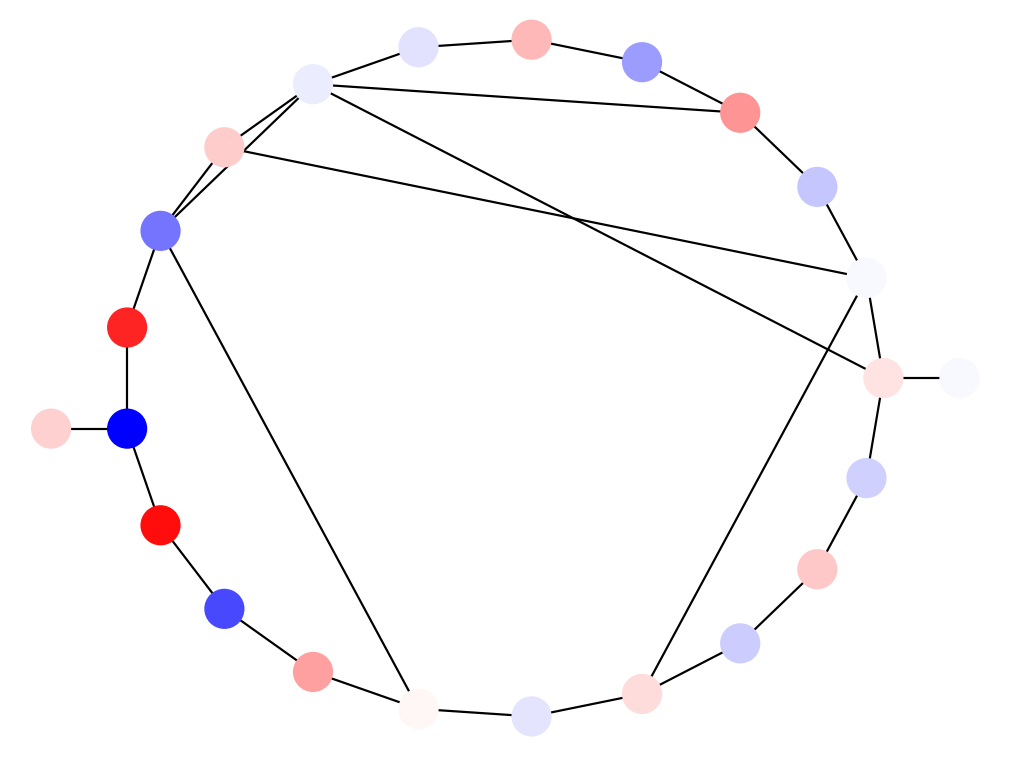

In [19]:
m = 0
print("k=", modes[m,0]-1j*modes[m,1])

naq_u1.set_chi((modes[m,0]-1j*modes[m,1])*naq_u1.chi0)
naq_u1.update_laplacian()
phi = naq_u1.compute_solution()
plt.figure()
nx.draw(G,pos=pos, node_color = np.real(phi),cmap='bwr',vmin=-np.max(abs(np.real(phi))),vmax=np.max(abs(np.real(phi))))
